### Marketing Analytics Project 


### Loading libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.cm as cm
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import sys
'geopandas' in sys.modules

In [3]:
import os
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

In [4]:
address = pd.read_csv("tbl_addresses.csv")
cust_acc = pd.read_csv("tbl_customer_accounts.csv") #cid
cust_rev = pd.read_csv("tbl_customer_reviews.csv")  #cid
cust = pd.read_csv("tbl_customers.csv") #cid
lab_rev = pd.read_csv("tbl_labelled_reviews.csv") #sentiment
orders = pd.read_csv("tbl_orders.csv") 
prod = pd.read_csv("tbl_products.csv")

### Exploratory Data analysis

##### **Address** dataset
Contains info on address corresponding to a customer account. 

address_id: Identify address (key);

postal_code: Postal code of the address;

district: Province/district of the address;

region: Region of the address


In [171]:
address.head()


,address_id,postal_code,district,region
0,1337,20083.0,MI,LOMBARDIA
1,1347,20090.0,MI,LOMBARDIA
2,1347,20090.0,MI,LOMBARDIA
3,1347,20090.0,MI,LOMBARDIA
4,1347,20090.0,MI,LOMBARDIA


In [172]:
# Check unique values of the "postal_code" column
unique_values = address['address_id'].unique()
print("Address_id unique values:", unique_values.shape[0])
print("Total number of rows in the dataset:", address.shape[0])

Address_id unique values: 157765
Total number of rows in the dataset: 245425


The unique values related to *address_id* are less than the total number of rows of the dataset. Therefore, duplicates related to this column will be removed.

In [173]:
#Handle duplicates
address.drop_duplicates(subset='address_id' , inplace=True)
print('Nr of rows:', address.shape[0]) #ok

Nr of rows: 157765


In [174]:
# Handle missing values
address.isnull().sum()

address_id         0
postal_code       47
district       15621
region          6530
dtype: int64

In [175]:
address

,address_id,postal_code,district,region
0,1337,20083.0,MI,LOMBARDIA
1,1347,20090.0,MI,LOMBARDIA
5,1387,20084.0,MI,LOMBARDIA
6,1412,20090.0,MI,LOMBARDIA
10,1418,20147.0,MI,LOMBARDIA
...,...,...,...,...
245415,824736,24040.0,BG,LOMBARDIA
245416,149079,20158.0,MI,LOMBARDIA
245419,484639,95100.0,CT,SICILIA
245421,651219,35030.0,PD,VENETO


merge with customers

In [178]:
cust

,customer_id,address_id,birthdate,gender,job_type,email_provider,flag_phone_provided,flag_privacy
0,891057,863914,2001-10-22,F,NaN,yahoo.it,1.0,True
1,655484,639856,2001-04-30,M,NaN,yahoo.it,1.0,False
2,514958,494806,2001-01-01,M,NaN,libero.it,1.0,True
3,398355,377261,2000-03-09,M,NaN,gmail.com,1.0,True
4,23808,20227,1999-11-21,F,NaN,virgilio.it,1.0,True
...,...,...,...,...,...,...,...,...
140941,449222,428121,1945-05-30,F,NaN,libero.it,1.0,True
140942,368113,346970,1943-11-18,F,NaN,yahoo.com,1.0,True
140943,424451,403292,1943-05-07,F,NaN,gmail.com,1.0,True
140944,808137,789737,1943-02-13,F,NaN,yahoo.it,1.0,True


In [184]:
ac = pd.merge(cust,address, on='address_id', how='left')
ac.head()

,customer_id,address_id,birthdate,gender,job_type,email_provider,flag_phone_provided,flag_privacy,postal_code,district,region
0,891057,863914,2001-10-22,F,NaN,yahoo.it,1.0,True,10035.0,TO,PIEMONTE
1,655484,639856,2001-04-30,M,NaN,yahoo.it,1.0,False,71010.0,FG,PUGLIA
2,514958,494806,2001-01-01,M,NaN,libero.it,1.0,True,42.0,NaN,NaN
3,398355,377261,2000-03-09,M,NaN,gmail.com,1.0,True,36050.0,VI,VENETO
4,23808,20227,1999-11-21,F,NaN,virgilio.it,1.0,True,60041.0,AN,MARCHE


In [181]:
ac[ac['region'].isnull()]

,customer_id,address_id,birthdate,gender,job_type,email_provider,flag_phone_provided,flag_privacy,postal_code,district,region
2,514958,494806,2001-01-01,M,NaN,libero.it,1.0,True,42.0,NaN,NaN
9,785720,770372,1998-12-25,M,NaN,gmail.com,1.0,True,49.0,NaN,NaN
37,501387,900091,1997-02-25,M,NaN,virgilio.it,1.0,True,NaN,NaN,NaN
38,501096,480659,1997-02-19,M,NaN,gmail.com,1.0,True,6081.0,NaN,NaN
44,869732,900091,1996-12-16,M,NaN,libero.it,1.0,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
140899,707508,691921,1954-06-28,F,NaN,alice.it,1.0,True,176.0,NaN,NaN
140918,900899,873760,1952-05-08,M,retired,personal_mail_provider_11975,1.0,True,165.0,NaN,NaN
140919,884757,857605,1952-03-08,M,NaN,gmail.com,1.0,True,68.0,NaN,NaN
140924,875077,900091,1951-06-07,F,NaN,personal_mail_provider_17261,1.0,True,NaN,NaN,NaN


8101 customers do not have a correct address registered.

Let's group the customers by region:

In [206]:
regional_group = ac.groupby('region', as_index=False)[['customer_id']].count()
regional_group.rename(columns={'customer_id': 'customers'}, inplace=True)
regional_group

,region,customers
0,ABRUZZO,2801
1,BASILICATA,396
2,CALABRIA,346
3,CAMPANIA,11526
4,EMILIA ROMAGNA,8971
5,FRIULI VENEZIA GIULIA,2252
6,LAZIO,14287
7,LIGURIA,3635
8,LOMBARDIA,39380
9,MARCHE,535


In [9]:
# df = address.groupby(['region'], as_index=False).count()

In [10]:
# df = df[['region','address_id']]
# new_column_names = {
#     'region' : 'NOME_REG',
#     'address_id': 'number',
# }
# df.rename(columns= new_column_names, inplace=True)
# df

,NOME_REG,number
0,ABRUZZO,3244
1,BASILICATA,467
2,CALABRIA,488
3,CAMPANIA,12883
4,EMILIA ROMAGNA,9600
5,FRIULI VENEZIA GIULIA,2785
6,LAZIO,14863
7,LIGURIA,3953
8,LOMBARDIA,47497
9,MARCHE,614


In [14]:
#  !pip3 install pandas geopandas matplotlib

In [185]:
# Carica il file delle regioni italiane
italy = gpd.read_file("/Users/juliabuixuan/Desktop/Marketing project/data_marketing_analytics_2023/reg2011_g.shp")


In [186]:
new_regions = pd.read_csv('reg2011_g.csv')

In [187]:
#We substitute the right column containing regions
italy['NOME_REG'] = new_regions['NOME_REG']
italy.head()

,geometry,NOME_REG
0,"POLYGON ((457832.312 5145701.000, 458745.249 5...",Piemonte
1,"POLYGON ((390734.999 5091965.001, 390830.999 5...",Aosta
2,"MULTIPOLYGON (((595736.187 5163715.001, 596126...",Lombardia
3,"POLYGON ((743386.080 5219948.900, 743472.190 5...",Trentino
4,"POLYGON ((768209.001 5175597.001, 768220.251 5...",Veneto


<Axes: >

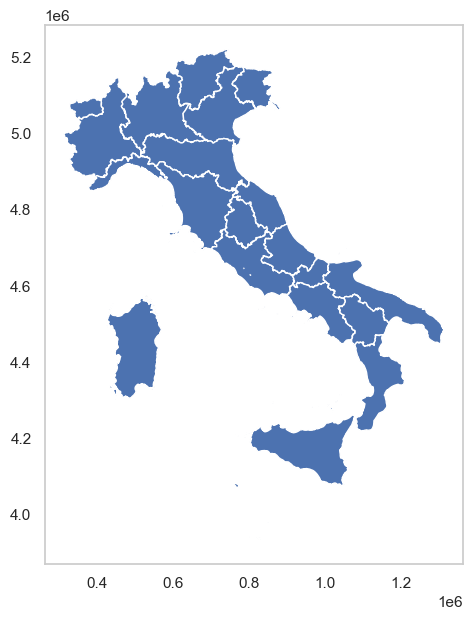

In [188]:
italy.plot(figsize=(7, 7))

In [189]:
# Assuming your DataFrame is named 'df' and the column you want to convert to lowercase is 'column_name'
italy['NOME_REG'] = italy['NOME_REG'].str.lower()
italy['NOME_REG'] = italy['NOME_REG'].str.replace(r'-', ' ')
italy

,geometry,NOME_REG
0,"POLYGON ((457832.312 5145701.000, 458745.249 5...",piemonte
1,"POLYGON ((390734.999 5091965.001, 390830.999 5...",aosta
2,"MULTIPOLYGON (((595736.187 5163715.001, 596126...",lombardia
3,"POLYGON ((743386.080 5219948.900, 743472.190 5...",trentino
4,"POLYGON ((768209.001 5175597.001, 768220.251 5...",veneto
5,"MULTIPOLYGON (((852211.994 5080672.916, 852270...",friuli venezia giulia
6,"MULTIPOLYGON (((400403.625 4851436.938, 400257...",liguria
7,"MULTIPOLYGON (((760714.748 4937319.399, 760723...",emilia romagna
8,"MULTIPOLYGON (((593650.250 4867988.000, 593553...",toscana
9,"MULTIPOLYGON (((771407.451 4833282.073, 771402...",umbria


In [203]:
regional_group.head()

,region,customers
0,ABRUZZO,2801
1,BASILICATA,396
2,CALABRIA,346
3,CAMPANIA,11526
4,EMILIA ROMAGNA,8971


In [210]:
regional_group['region'] = regional_group['region'].str.lower()
regional_group['region'] = regional_group['region'].str.replace(r'-', ' ')
regional_group['region'] = regional_group['region'].replace("valle d'aosta", 'aosta')
regional_group['region'] = regional_group['region'].replace("trentino alto adige", 'trentino')
regional_group.head()

,region,customers
0,abruzzo,2801
1,basilicata,396
2,calabria,346
3,campania,11526
4,emilia romagna,8971


In [212]:
regional_group.rename(columns={'region':'NOME_REG'}, inplace=True)

In [224]:
#merging the two datasets
merge = italy.merge(regional_group, on='NOME_REG')
merge.sort_values(by='customers', ascending=False)

,geometry,NOME_REG,customers
2,"MULTIPOLYGON (((595736.187 5163715.001, 596126...",lombardia,39380
11,"MULTIPOLYGON (((802704.568 4594643.932, 802540...",lazio,14287
4,"POLYGON ((768209.001 5175597.001, 768220.251 5...",veneto,12261
14,"MULTIPOLYGON (((925294.173 4528798.912, 925329...",campania,11526
0,"POLYGON ((457832.312 5145701.000, 458745.249 5...",piemonte,10081
18,"MULTIPOLYGON (((803299.052 4188096.575, 803275...",sicilia,9672
7,"MULTIPOLYGON (((760714.748 4937319.399, 760723...",emilia romagna,8971
15,"MULTIPOLYGON (((1141891.750 4588535.750, 11418...",puglia,7932
8,"MULTIPOLYGON (((593650.250 4867988.000, 593553...",toscana,5859
6,"MULTIPOLYGON (((400403.625 4851436.938, 400257...",liguria,3635


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


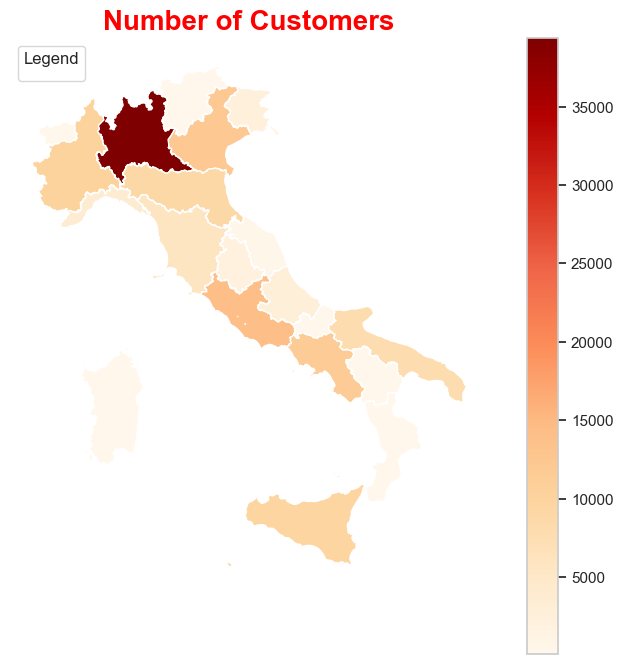

In [216]:
fig, ax = plt.subplots(1, figsize=(10, 8))
col = 'customers'

ax.set_title('Number of Customers', fontsize=20, fontweight='bold', color='red')
plt.rcParams['font.family'] = 'Arial'

merge.plot(ax=ax, column=col, cmap='OrRd', legend=True, categorical=False)

ax.set_axis_off()  # Hide the axes

# Hide the border lines
for spine in ax.spines.values():
    spine.set_visible(False)

# Add a legend with adjusted position
legend = ax.legend(loc='upper left', title='Legend')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


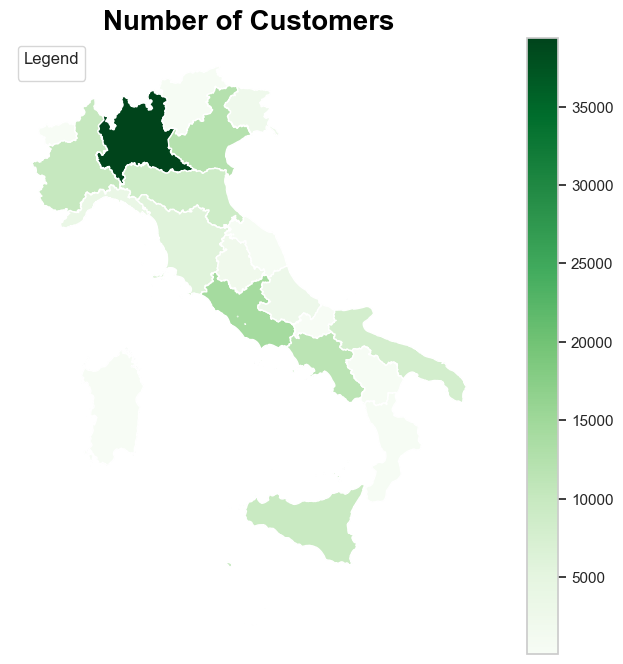

In [236]:
#prova
fig, ax = plt.subplots(1, figsize=(10, 8))#, facecolor='white')  # Set the facecolor of the figure
col = 'customers'

ax.set_title('Number of Customers', fontsize=20, fontweight='bold', color='Black')
plt.rcParams['font.family'] = 'Arial'

merge.plot(ax=ax, column=col, cmap='Greens', legend=True, categorical=False)

ax.set_axis_off()

for spine in ax.spines.values():
    spine.set_visible(False)

legend = ax.legend(loc='upper left', title='Legend')

plt.show()


The region with the highest number of customers is Lombardy, followed by Lazio and Veneto.

##### **Products** datasets
*product_id*: identify the product (key);

*product_class*: identify the department corresponding to the product

In [237]:
prod.head()

,product_id,product_class
0,35996051,9
1,35980371,14
2,31276196,4
3,31276224,4
4,31456495,4


There are only unique values:

In [238]:
# Check unique values of the "postal_code" column
unique_values = prod['product_id'].unique()
print("product_id unique values:", unique_values.shape[0])
print("Total number of rows in the dataset:", prod.shape[0])

product_id unique values: 88538
Total number of rows in the dataset: 88538


There are no missing values in the product table:

In [239]:
# Handle missing values
prod.isnull().sum()

product_id       0
product_class    0
dtype: int64

In [240]:
class_counts = prod['product_class'].value_counts().sort_values(ascending=False)

print("Class counts:")
print(class_counts)


Class counts:
product_class
12    13893
9     13325
7      9974
10     9845
3      7326
11     6690
4      5945
13     5283
2      4105
6      3340
5      2528
8      2241
1      2203
14     1840
Name: count, dtype: int64


Categories 12 and 9 have most products

In [241]:
average_count = class_counts.mean()
average_count

6324.142857142857

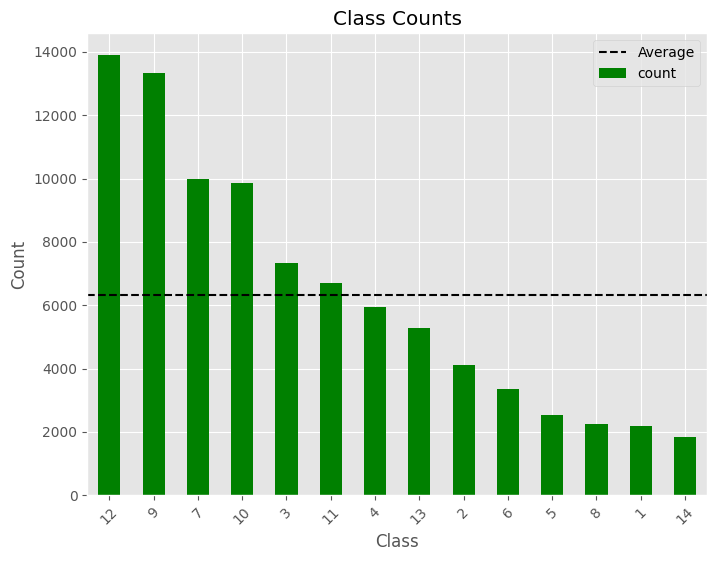

In [10]:
# Create a bar plot
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))  
class_counts.plot(kind='bar', color='green')  
plt.axhline(y=average_count, color='black', linestyle='--', label='Average')  
plt.title("Class Counts")  
plt.xlabel("Class")  
plt.ylabel("Count") 
plt.xticks(rotation=45) 
plt.legend() 

plt.show()  

As we can see from the above graph, the products belonging to class 12, 9, 7, 10, 3 and 11 are the ones with the majority of products. As a matter of fact, their frequency is greater than the average of products, that is 6324.

##### **Orders** dataset

In [242]:
orders.head()
orders.shape

(1039865, 8)

In [243]:
orders['purchase_datetime'] = pd.to_datetime(orders['purchase_datetime'], format='%Y-%m-%dT%H%M%S')

In [248]:
orders[(orders['gross_price'] >= 0) & (orders['direction'] == -1)]

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime
546654,5037a10e3566408eaa4b089a5ed6a419,444017,34,34979420,-1,0.6,0.6,2022-10-25 14:21:12
546655,5037a10e3566408eaa4b089a5ed6a419,444017,34,34979420,-1,0.6,0.6,2022-10-25 14:21:12
546656,5037a10e3566408eaa4b089a5ed6a419,444017,34,34979420,-1,0.6,0.6,2022-10-25 14:21:12
590400,d6f0dbda5f1e525f3a3b2736677a1a39,469483,15,48020203,-1,0.0,0.0,2023-03-07 17:37:33


In [249]:
#check for incompatibilites
#delete refunded items that have a positive gross price
orders = orders[~((orders['gross_price'] >= 0) & (orders['direction'] == -1))]


In [251]:
orders[orders['gross_price'] == 0]

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime
155769,4496a29ff414ceb41c0db0e93c1f96b8,116152,47,48070211,1,0.0,0.0,2023-01-12 13:53:42
192000,d4b03e3cc409e3ead0c4d85c1be8b347,155854,18,48020504,1,0.0,0.0,2022-07-16 19:18:43
215033,3766b6366b8557485c6ede1d49d26759,179063,22,34848891,1,0.0,0.0,2023-04-25 11:05:05
215034,3766b6366b8557485c6ede1d49d26759,179063,22,34848891,1,0.0,0.0,2023-04-25 11:05:05
215035,3766b6366b8557485c6ede1d49d26759,179063,22,34848891,1,0.0,0.0,2023-04-25 11:05:05
215036,3766b6366b8557485c6ede1d49d26759,179063,22,34848891,1,0.0,0.0,2023-04-25 11:05:05
215037,3766b6366b8557485c6ede1d49d26759,179063,22,34848891,1,0.0,0.0,2023-04-25 11:05:05
215038,3766b6366b8557485c6ede1d49d26759,179063,22,34848891,1,0.0,0.0,2023-04-25 11:05:05
215039,3766b6366b8557485c6ede1d49d26759,179063,22,34848891,1,0.0,0.0,2023-04-25 11:05:05
215040,3766b6366b8557485c6ede1d49d26759,179063,22,34848891,1,0.0,0.0,2023-04-25 11:05:05


In [250]:
orders[orders['direction']== -1]

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime
12,7927c5116d8aae47d86b75f67ac94a6f,23,49,33794292,-1,-1.99,0.0,2022-11-17 10:49:29
13,7927c5116d8aae47d86b75f67ac94a6f,23,49,33795776,-1,-5.10,0.0,2022-11-17 10:49:29
80,f74d58077490151356324b25f6f29052,48,49,33933655,-1,-43.92,0.0,2022-12-29 17:56:21
83,ceb935c410873ca3213826fa0b393976,48,49,31047464,-1,-3.92,0.0,2022-12-29 19:10:38
84,ceb935c410873ca3213826fa0b393976,48,49,33883955,-1,-113.00,0.0,2022-12-29 19:10:38
...,...,...,...,...,...,...,...,...
1039581,6e21ab52559a47b71fd8670608b754d9,926607,39,81269181,-1,-11.52,0.0,2023-04-27 10:12:47
1039582,148ecd18f8c783fafd5898f794ea812b,926607,39,81269181,-1,-23.04,0.0,2023-04-27 10:13:09
1039626,c8b4e94fdfb6acfa76b5375ca176f8d7,927548,39,32842642,-1,-2.40,0.0,2023-04-27 11:54:14
1039627,c8b4e94fdfb6acfa76b5375ca176f8d7,927548,39,32842600,-1,-21.60,0.0,2023-04-27 11:54:14


In [252]:
unique_values = orders['order_id'].unique()
print("order_id unique values:", unique_values.shape[0])
print("Total number of rows in the dataset:", orders.shape[0])

order_id unique values: 371803
Total number of rows in the dataset: 1039861


There are duplicates regarding the id of the transaction, however this is not an error; a customer in the same transaction can purchase different products. Therefore, these duplicates won't be deletded.

Let's group by the customer_id, to see which are the customers that made the most of the transactions:

In [253]:
transaction_count = orders.groupby('customer_id').count()
grouped = transaction_count['order_id'].sort_values(ascending=False)

In [254]:
grouped.to_frame()

,order_id
customer_id,
447120,1946
745907,1575
229887,1361
337,1217
357446,1155
...,...
751789,1
302598,1
751758,1


First 10 customers with most transactions:

In [255]:
grouped.head(10)

customer_id
447120    1946
745907    1575
229887    1361
337       1217
357446    1155
572977    1080
414783    1075
828940    1038
157390     860
322564     808
Name: order_id, dtype: int64

In [257]:
cust[cust['customer_id'] == 447120]

,customer_id,address_id,birthdate,gender,job_type,email_provider,flag_phone_provided,flag_privacy
122036,447120,382930,1978-08-18,M,retired,NaN,NaN,False


Customers with less transactions (=1)

In [79]:
grouped.tail(10)

customer_id
91438     1
302684    1
302428    1
302673    1
302641    1
751789    1
302598    1
751758    1
302458    1
934716    1
Name: order_id, dtype: int64

### Market Basket Analysis - product focus

To compute the most frequent purchased products, consider the transactions dataset and group by the product id and count the number of these products. Then, merge with products dataset to check the product class. Finally merge by product class and compute the percentage for each class to see which are the most and less frequently bought products.

##### Percentage frequent products

In [5]:
orders.head()

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.0,2022-10-04T182851
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1,1.99,0.0,2022-10-04T182851
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1,5.10,0.0,2022-10-04T182851
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1,76.05,0.0,2022-10-04T182851


In [4]:
orders.shape[0] #total number of transactions - each transaction represents a single product

1039865

In [6]:
prodotti = orders[orders['direction'] == 1] #consider only purchases, no refunds transaction
prodotti.shape[0]
prodotti

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.0,2022-10-04T182851
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1,1.99,0.0,2022-10-04T182851
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1,5.10,0.0,2022-10-04T182851
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1,76.05,0.0,2022-10-04T182851
...,...,...,...,...,...,...,...,...
1039860,697c0078b69d9f8c119d8dd9a7952019,934581,29,35508942,1,33.60,0.0,2023-04-30T193553
1039861,86c9c4fdb8829e2ab90a86a357763419,934620,44,36237691,1,11.99,0.0,2023-04-30T191955
1039862,86c9c4fdb8829e2ab90a86a357763419,934620,44,81259479,1,9.99,0.0,2023-04-30T191955
1039863,86f8ca9e4008249e5e0acc5ff23e2284,934660,46,34067775,1,1.90,0.0,2023-04-30T193217


In [7]:
prodotti = prodotti.groupby('product_id').count() #.sort_values(by='customer_id', ascending=False)
prodotti = prodotti[['order_id']]
prodotti.rename(columns={'order_id' : 'count'}, inplace=True)
prodotti

,count
product_id,
504553,248
30033521,210
30044455,403
30062452,239
30072014,244
...,...
82040488,211
82042962,248
82042965,221


In [8]:
prod[prod['product_id'] == 33700716] #prova

,product_id,product_class
10,33700716,10


In [9]:
#merge with product class
prodotti_class = pd.merge(prodotti, prod, on='product_id' )

In [10]:
prodotti_class

,product_id,count,product_class
0,504553,248,10
1,30033521,210,9
2,30044455,403,11
3,30062452,239,11
4,30072014,244,10
...,...,...,...
1995,82040488,211,12
1996,82042962,248,11
1997,82042965,221,11
1998,82042968,243,11


In [11]:
#descending order of product classes
prodotti_class = prodotti_class.groupby('product_class').sum().sort_values(by='count', ascending=False)[['count']]

In [12]:
prodotti_class

,count
product_class,
3,281389
11,131693
10,111877
7,83206
13,64039
2,52811
4,49157
6,47966
9,44983


In [13]:
tot_trans = orders[orders['direction'] == 1].shape[0] #no refunds

In [14]:
#computing percentage over all transactions 
prodotti_class['perc'] = prodotti_class['count'] / tot_trans * 100

In [15]:
prodotti_class

,count,perc
product_class,,
3,281389,28.792254
11,131693,13.475076
10,111877,11.447466
7,83206,8.513795
13,64039,6.552591
2,52811,5.403721
4,49157,5.029837
6,47966,4.907972
9,44983,4.602746


The most frequently purchased products belong to category 3, 11 and 10, representing respectively the 29%, 13% and 11% of purchases within the total transactions.

##### Percentage refunded products

In [16]:
ref = orders[orders['direction']== -1] #consider only refunds

In [17]:
ref.shape[0]

62557

In [18]:
orders[orders['direction']== -1].shape[0] / tot_trans * 100

6.400950365698428

6% of products sold are refunded. Let's see which are the refunded products.

In [19]:
ref_class = pd.merge(ref,prod, on="product_id" ) #merge 
ref_class.head()

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class
0,7927c5116d8aae47d86b75f67ac94a6f,23,49,33794292,-1,-1.99,0.0,2022-11-17T104929,6
1,f205a478de908e6ed56bc29273a7c687,918,22,33794292,-1,-1.99,0.0,2023-02-03T180103,6
2,c4bbc19492be5f2d6789a18b2c0e40b6,21849,6,33794292,-1,-9.95,0.0,2022-12-17T174907,6
3,650f116d0c25cb2527864efe05f14d08,312308,44,33794292,-1,-1.99,0.0,2022-07-11T104838,6
4,d6d222aa2e90c52013ba75ce1a7d556b,334708,11,33794292,-1,-3.98,0.0,2022-06-13T193914,6


In [20]:
ref_grouped = ref_class.groupby("product_class").count()
ref_grouped = ref_grouped.sort_values(by='order_id', ascending= False)[['order_id']]


In [21]:
ref_grouped['perc'] = ref_grouped['order_id'] / ref.shape[0] * 100

In [22]:
ref_grouped

,order_id,perc
product_class,,
3,35320,56.460508
6,7077,11.312883
7,4475,7.153476
13,3466,5.540547
8,2385,3.812523
11,2277,3.639880
2,2241,3.582333
1,1182,1.889477
10,1121,1.791966


The most refunded products belong to category 3, with a total of 35320 refunds. This means 56% of total refunds. They are followed by categories 6 and 7, representing 11% and 7% of total refunds.

Let's see which products of category 3 are the most refunded:


In [125]:
ref_class[ref_class['product_class'] == 3].groupby('product_id').count().sort_values(by='order_id', ascending=False)

,order_id,customer_id,store_id,direction,gross_price,price_reduction,purchase_datetime,product_class
product_id,,,,,,,,
35662515,3492,3492,3492,3492,3492,3492,3492,3492
32842551,2370,2370,2370,2370,2370,2370,2370,2370
35662564,1507,1507,1507,1507,1507,1507,1507,1507
32981935,1287,1287,1287,1287,1287,1287,1287,1287
31047464,1146,1146,1146,1146,1146,1146,1146,1146
...,...,...,...,...,...,...,...,...
34331192,1,1,1,1,1,1,1,1
36268946,1,1,1,1,1,1,1,1
34202343,1,1,1,1,1,1,1,1


The most refunded product has the following id: 35662515. It was refunded 3492 times! 

##### Products with greatest gross income:

In [43]:
orders['purchase_datetime'] = pd.to_datetime(orders['purchase_datetime'], format='%Y-%m-%dT%H%M%S')

In [44]:
orders_class = pd.merge(orders, prod, on='product_id', how = 'inner')

In [45]:
orders_class

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.00,2022-10-04 18:28:51,6
1,bfe77aedcfc4098926ad5b133cec4a1d,900,18,35551922,1,229.90,22.99,2023-01-08 13:54:07,6
2,0785791dd07b165a9af7729a91c61689,1215,49,35551922,1,41.80,0.00,2022-08-26 19:52:30,6
3,1b3e6d9fcbbe3890c2c0e36a27f49f3b,1351,22,35551922,1,647.90,64.79,2022-09-29 14:52:26,6
4,97f7846be121869a143c060ad5dbdd02,1351,22,35551922,1,62.70,0.00,2022-12-05 08:52:01,6
...,...,...,...,...,...,...,...,...,...
1039860,f739cb1651bebfe19be2f178334ee0b2,655384,26,81259510,1,11.96,0.00,2022-11-10 11:47:44,13
1039861,48fab99450c33760765b765c354ccc23,662191,37,81259510,1,2.99,0.00,2023-03-31 19:30:17,13
1039862,865be2ee5cf3e17230c66115dc93c60a,663065,49,81259510,1,2.99,0.00,2023-01-08 17:51:19,13
1039863,414fe1aafa7047d4be69798f5b03e06e,785772,44,81259510,1,5.98,0.00,2023-01-20 15:43:44,13


In [46]:
tot_gross = orders['gross_price'].sum() #tot both purchased - refunded
tot_gross

27680032.789999995

In [47]:
gross = orders_class.groupby("product_class")['gross_price'].sum().reset_index().sort_values(by='gross_price', ascending=False)
gross['perc'] = gross['gross_price'] / tot_gross * 100
gross

,product_class,gross_price,perc
1,2,10924252.04,39.466182
5,6,4248166.03,15.347402
6,7,3569714.50,12.896352
2,3,2365249.11,8.544965
12,13,1429410.70,5.164050
10,11,1208630.73,4.366435
7,8,1097201.41,3.963873
0,1,564456.15,2.039218
13,14,561878.44,2.029905
9,10,496439.47,1.793493


Products belonging to category 2 provide the greatest profit to the company, followed by categories 6 and 7. They represent respectively 39%, 15% and 13% of the total profits.

##### Products over time - last year period

Transactions are registered from 2022/05/01 until 2023/04/30. One year

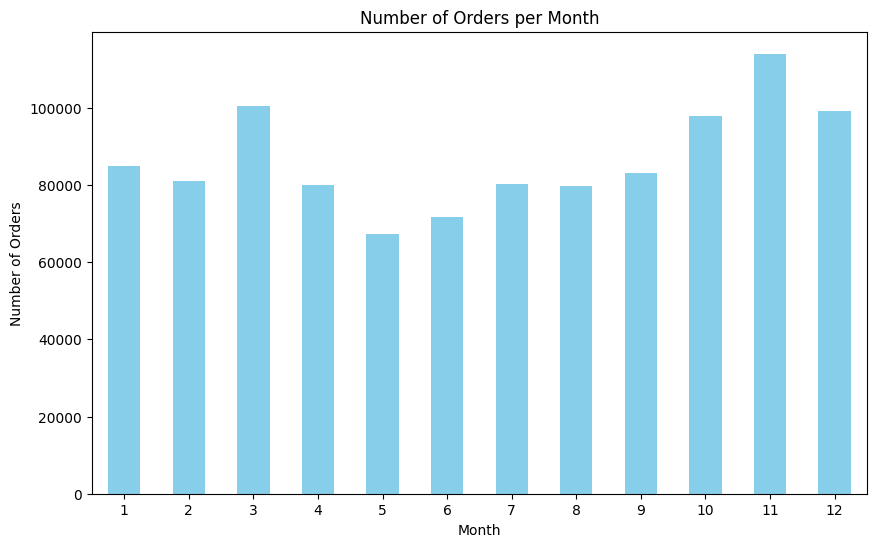

In [32]:
# Extract month from the 'purchase_datetime' column
orders['purchase_month'] = orders['purchase_datetime'].dt.month

# Group by month and count the number of orders in each month
orders_per_month = orders.groupby('purchase_month').size()

# Plot the number of orders per month
plt.figure(figsize=(10, 6))
orders_per_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Month')
plt.xticks(rotation=0)
plt.show()


##### Price reduction analysis

In [48]:
orders =  pd.merge(orders, prod, on='product_id', how = 'inner')

In [49]:
#check how many price reductions
red = orders[orders['price_reduction'] != 0.00] 
red

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class
1,bfe77aedcfc4098926ad5b133cec4a1d,900,18,35551922,1,229.90,22.99,2023-01-08 13:54:07,6
3,1b3e6d9fcbbe3890c2c0e36a27f49f3b,1351,22,35551922,1,647.90,64.79,2022-09-29 14:52:26,6
5,5a91a042ce74c2549f51cd29d3ae887a,1801,32,35551922,1,313.50,31.35,2022-11-10 12:50:31,6
7,df59b18ee3788ffde316923bdbc547a9,5071,34,35551922,1,62.70,6.27,2022-07-21 17:04:51,6
15,98a1ec08aeb220d0ed6e52a1d65d1204,6828,17,35551922,1,20.90,1.38,2022-08-12 10:40:27,6
...,...,...,...,...,...,...,...,...,...
1039841,0420465f4675010f7dfecaafbb183573,47463,41,81259510,1,2.99,0.30,2023-04-20 14:39:36,13
1039842,0420465f4675010f7dfecaafbb183573,47463,41,81259510,1,2.99,0.30,2023-04-20 14:39:36,13
1039843,0420465f4675010f7dfecaafbb183573,47463,41,81259510,1,2.99,0.30,2023-04-20 14:39:36,13
1039844,0420465f4675010f7dfecaafbb183573,47463,41,81259510,1,2.99,0.30,2023-04-20 14:39:36,13


In [50]:
red_pos = red[red['price_reduction'] > 0] #do not consider refunds
red_pos

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class
1,bfe77aedcfc4098926ad5b133cec4a1d,900,18,35551922,1,229.90,22.99,2023-01-08 13:54:07,6
3,1b3e6d9fcbbe3890c2c0e36a27f49f3b,1351,22,35551922,1,647.90,64.79,2022-09-29 14:52:26,6
5,5a91a042ce74c2549f51cd29d3ae887a,1801,32,35551922,1,313.50,31.35,2022-11-10 12:50:31,6
7,df59b18ee3788ffde316923bdbc547a9,5071,34,35551922,1,62.70,6.27,2022-07-21 17:04:51,6
15,98a1ec08aeb220d0ed6e52a1d65d1204,6828,17,35551922,1,20.90,1.38,2022-08-12 10:40:27,6
...,...,...,...,...,...,...,...,...,...
1039841,0420465f4675010f7dfecaafbb183573,47463,41,81259510,1,2.99,0.30,2023-04-20 14:39:36,13
1039842,0420465f4675010f7dfecaafbb183573,47463,41,81259510,1,2.99,0.30,2023-04-20 14:39:36,13
1039843,0420465f4675010f7dfecaafbb183573,47463,41,81259510,1,2.99,0.30,2023-04-20 14:39:36,13
1039844,0420465f4675010f7dfecaafbb183573,47463,41,81259510,1,2.99,0.30,2023-04-20 14:39:36,13


In [51]:
red_pos.shape[0] / orders.shape[0] * 100 #products bought (and not refunded) with a discount

24.927274213479635

In [52]:
tot_cust = orders[['customer_id']].nunique() #total number of customers who made transactions

In [53]:
unique_cust = red_pos[['customer_id']].nunique() #total number of customers who made transactions of discounted products

In [54]:
unique_cust / tot_cust * 100

customer_id    42.235005
dtype: float64

42% of customers have purchased discounted products

In [55]:
red_pos.groupby('product_id').count().sort_values(by='order_id',ascending=False)

,order_id,customer_id,store_id,direction,gross_price,price_reduction,purchase_datetime,product_class
product_id,,,,,,,,
48011971,9956,9956,9956,9956,9956,9956,9956,9956
48020504,7368,7368,7368,7368,7368,7368,7368,7368
81274749,3998,3998,3998,3998,3998,3998,3998,3998
81274743,3592,3592,3592,3592,3592,3592,3592,3592
33700716,2376,2376,2376,2376,2376,2376,2376,2376
...,...,...,...,...,...,...,...,...
33937225,8,8,8,8,8,8,8,8
30033521,8,8,8,8,8,8,8,8
32093992,7,7,7,7,7,7,7,7


The discounted products most frequently purchased are 48011971 and 48020504, both belonging to class 2. Discount amount depends on the store.

In [57]:
red_pos[red_pos['product_id'] == 48011971].head() #check class

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class
806207,ad8c22afdb7cf355d2c7add4ac73f2d1,2263,36,48011971,1,511.63,6.69,2022-11-03 15:51:32,2
806208,ad8c22afdb7cf355d2c7add4ac73f2d1,2263,36,48011971,1,511.63,6.69,2022-11-03 15:51:32,2
806209,ad8c22afdb7cf355d2c7add4ac73f2d1,2263,36,48011971,1,511.63,6.69,2022-11-03 15:51:32,2
806210,ad8c22afdb7cf355d2c7add4ac73f2d1,2263,36,48011971,1,511.63,6.69,2022-11-03 15:51:32,2
806211,ad8c22afdb7cf355d2c7add4ac73f2d1,2263,36,48011971,1,511.63,6.69,2022-11-03 15:51:32,2


In [42]:
red_pos[red_pos['product_id'] == 48020504].head() #check 

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,purchase_month,product_class
102751,8470506cf383d955caec32c68ff7c0da,146,9,48020504,1,150.00,15.00,2022-06-14 08:32:31,6,2
102752,445cbaf03440d9fbe679e6f932c0e04a,146,9,48020504,1,150.00,150.00,2022-07-16 07:37:27,7,2
102755,29a32dc3d41d62abca4a8b2e229aa940,1059,21,48020504,1,377.84,29.99,2023-02-04 13:41:46,2,2
102756,29a32dc3d41d62abca4a8b2e229aa940,1059,21,48020504,1,377.84,29.99,2023-02-04 13:41:46,2,2
102757,29a32dc3d41d62abca4a8b2e229aa940,1059,21,48020504,1,377.84,29.99,2023-02-04 13:41:46,2,2


##### MBA - products sold together
Filter out transactions with only one product and refunds

In [58]:
orders.head()

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.4,0.00,2022-10-04 18:28:51,6
1,bfe77aedcfc4098926ad5b133cec4a1d,900,18,35551922,1,229.9,22.99,2023-01-08 13:54:07,6
2,0785791dd07b165a9af7729a91c61689,1215,49,35551922,1,41.8,0.00,2022-08-26 19:52:30,6
3,1b3e6d9fcbbe3890c2c0e36a27f49f3b,1351,22,35551922,1,647.9,64.79,2022-09-29 14:52:26,6
4,97f7846be121869a143c060ad5dbdd02,1351,22,35551922,1,62.7,0.00,2022-12-05 08:52:01,6


In [59]:
# Series containing counts of unique rows in the DataFrame 
unique_trans = orders.value_counts('order_id') 

In [60]:
multi_trans = unique_trans[unique_trans>1].index
len(multi_trans)

201734

In [61]:
# Filter the DataFrame to keep only transactions with more than one product
filtered_df = orders[orders['order_id'].isin(multi_trans)]

filtered_df = filtered_df[filtered_df['direction'] == 1]
filtered_df

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.00,2022-10-04 18:28:51,6
1,bfe77aedcfc4098926ad5b133cec4a1d,900,18,35551922,1,229.90,22.99,2023-01-08 13:54:07,6
2,0785791dd07b165a9af7729a91c61689,1215,49,35551922,1,41.80,0.00,2022-08-26 19:52:30,6
3,1b3e6d9fcbbe3890c2c0e36a27f49f3b,1351,22,35551922,1,647.90,64.79,2022-09-29 14:52:26,6
4,97f7846be121869a143c060ad5dbdd02,1351,22,35551922,1,62.70,0.00,2022-12-05 08:52:01,6
...,...,...,...,...,...,...,...,...,...
1039857,17233c703260ffbbae4cc8de5a322049,578271,37,81259510,1,2.99,0.00,2022-12-01 18:17:16,13
1039858,17233c703260ffbbae4cc8de5a322049,578271,37,81259510,1,2.99,0.00,2022-12-01 18:17:16,13
1039860,f739cb1651bebfe19be2f178334ee0b2,655384,26,81259510,1,11.96,0.00,2022-11-10 11:47:44,13
1039862,865be2ee5cf3e17230c66115dc93c60a,663065,49,81259510,1,2.99,0.00,2023-01-08 17:51:19,13


In [62]:
filtered_df['product_id']

0          35551922
1          35551922
2          35551922
3          35551922
4          35551922
             ...   
1039857    81259510
1039858    81259510
1039860    81259510
1039862    81259510
1039864    81259510
Name: product_id, Length: 820263, dtype: int64

In [9]:
pivot_df = filtered_df.pivot_table(index='order_id', columns='product_id', aggfunc='size', fill_value=0)

# # Reset index to make transactions a column
# pivot_df = pivot_df.reset_index()

In [11]:
pivot_df

product_id,504553,30033521,30044455,30062452,30072014,30097186,30097291,30097340,30099454,30126292,...,82019008,82026198,82026199,82029521,82029522,82040488,82042962,82042965,82042968,82042974
order_id,,,,,,,,,,,,,,,,,,,,,
0000901a817e533f4a95d2839c5575a3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0000f2817342879fac36a6b9f6a55990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0001231326e40e177b91e3bbe2c85358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00022115c5638382d758a0d7dd9ee0a1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000268e2f8e3612058d55568fa884b9e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe88e6619ba61a9d0197a3f34ea945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffef1e4766017e75f0db930c336e4d6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffff54d721bb08014f192e39d8c1908c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
 #converting frequency values into binary values (0 or 1).
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
    
basket_input = pivot_df.applymap(encode)

In [ ]:
#!pip install mlxtend

In [17]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(basket_input, min_support=0.003, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

frequent_itemsets


/opt/homebrew/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.155650,(33700716),1
1,0.070670,(33817091),1
2,0.036260,(34843564),1
3,0.019086,(32882024),1
4,0.014423,(34252904),1
...,...,...,...
298,0.003011,(81265211),1
299,0.003011,(34899851),1
300,0.003006,(32449354),1
301,0.003001,(33892586),1


In [25]:
rules = association_rules(frequent_itemsets, metric='lift',min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(36298416),(36298353),0.003850,0.007222,0.003346,0.869221,120.364405,0.003319,7.591245,0.995524
1,(36298353),(36298416),0.007222,0.003850,0.003346,0.463380,120.364405,0.003319,1.856343,0.998906
2,(36298395),(36298353),0.004119,0.007222,0.003570,0.866667,120.010751,0.003540,7.445838,0.995769
3,(36298353),(36298395),0.007222,0.004119,0.003570,0.494366,120.010751,0.003540,1.969569,0.998881
4,(36298206),(36298122),0.004709,0.006840,0.003865,0.820734,119.987699,0.003833,5.540157,0.996358


In [39]:
rules_top = rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.7) &
       (rules['leverage'] >= 0.004) ]

rules_top[:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(36298353),(36298381),0.007222,0.006281,0.005421,0.750704,119.524878,0.005376,3.986106,0.998847
9,(36298381),(36298353),0.006281,0.007222,0.005421,0.863158,119.524878,0.005376,7.254919,0.997901
25,(31047464),(31047485),0.006484,0.008295,0.004862,0.749804,90.396195,0.004808,3.963713,0.995392
62,"(31618300, 34129942)",(31618405),0.006367,0.011397,0.004862,0.763578,66.998968,0.004789,4.181524,0.991387
86,"(32079082, 32842551)",(32079103),0.005803,0.014041,0.005274,0.908852,64.726647,0.005192,10.817104,0.990297


In [47]:
prod[prod['product_id'] == 32079082]

,product_id,product_class
670,32079082,3


In [49]:
prod[prod['product_id'] == 32079103]

,product_id,product_class
671,32079103,3


Top 5 rules. All the products belong to category 3.

### Sentiment Analysis - feedback focus

Address detractor and promoter customers with a loyal engagement marketing campaign to reduce the negative impact of detractors and to incentive the positive effect of promoters [SENTIMENT ANALYSIS].

In [63]:
cust_rev.head(2)

,review_id,customer_id,review_text
0,1,814256,I have bought several of the Vitality canned d...
1,2,457475,Product arrived labeled as Jumbo Salted Peanut...


##### Preprocessing

In [64]:
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [65]:
import pandas as pd
import json
import numpy as np
from collections import defaultdict
from pathlib import Path
import pandas as pd
import string
import re
from nltk.corpus import stopwords
from autocorrect import Speller
from nltk.stem import WordNetLemmatizer 

In [7]:
pd.set_option('display.max_colwidth', None)

In [138]:
rev_pre = pd.read_csv("tbl_customer_reviews.csv")  #cid

Preprocessing steps include: punctuation removal, case folding, numbers removal, extra whitespaces, tokenization, stopwords and lemmatization.

In [9]:
#case folding
rev_pre['review_text'] = rev_pre['review_text'].str.lower()

In [10]:
#numbers removal
rev_pre['review_text'] = rev_pre['review_text'].apply(lambda x: re.sub(r"\d+", "", x))

In [11]:
#remove newlines, line breaks
def remove_newlines_tabs(text):
    formatted = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com').replace('<br />',' ')
    return formatted

In [12]:
rev_pre.review_text = rev_pre.review_text.apply(lambda text: remove_newlines_tabs(text))

In [13]:
rev_pre

,review_id,customer_id,review_text
0,1,814256,i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than most.
1,2,457475,"product arrived labeled as jumbo salted peanuts...the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intended to represent the product as ""jumbo""."
2,3,104045,"this is a confection that has been around a few centuries. it is a light, pillowy citrus gelatin with nuts - in this case filberts. and it is cut into tiny squares and then liberally coated with powdered sugar. and it is a tiny mouthful of heaven. not too chewy, and very flavorful. i highly recommend this yummy treat. if you are familiar with the story of c.s. lewis' ""the lion, the witch, and the wardrobe"" - this is the treat that seduces edmund into selling out his brother and sisters to the witch."
3,4,603662,if you are looking for the secret ingredient in robitussin i believe i have found it. i got this in addition to the root beer extract i ordered (which was good) and made some cherry soda. the flavor is very medicinal.
4,5,739314,"great taffy at a great price. there was a wide assortment of yummy taffy. delivery was very quick. if your a taffy lover, this is a deal."
...,...,...,...
105705,140942,224091,"we love,love our keurig coffee maker .my husband lives and breathes coffee and would rather have coffee at home than at store and he makes it himself .he perfers regular and i get the decaf."
105706,140943,196666,this is supposed to be a light roast coffee but it states extra bold on the label. how can a light roast coffee be extra bold. the outside of the box does not state that it is extra bold it only says light roast. threw the entire box in the garbage after i tasted the first cup. did not want to be bothered with returns.
105707,140944,618226,"i have always been happy with my kcups but this particular box is not good! i made a cup and it was full of grinds, i thought maybe it was just that one so i made another....full of grinds. i can't use them!"
105708,140945,844918,i ordered light roast coffee and was sent one box of light roast and one box of extra bold. i didn't notice the error until i had used a couple of the extra bold pods. way too strong for me and i am very disappointed. the light roast was really good.


In [14]:
#data containing links
data_links = rev_pre[rev_pre['review_text'].str.contains(r"www\.[A-Za-z]*\.com", regex = True)] 
print("Size of the dataset with links:", data_links.shape)
display(data_links.head(2))

Size of the dataset with links: (2236, 3)


,review_id,customer_id,review_text
16,22,788261,"i bought these for my husband who is currently overseas. he loves these, and apparently his staff likes them also. there are generous amounts of twizzlers in each -ounce bag, and this was well worth the price. <a href=""http://www.amazon.com/gp/product/bgvisjm"">twizzlers, strawberry, -ounce bags (pack of )</a>"
19,26,817698,"product received is as advertised. <a href=""http://www.amazon.com/gp/product/bgvisjm"">twizzlers, strawberry, -ounce bags (pack of )</a>"


There are hyperlinks, so let's remove the entire format of them.

In [15]:
rev_pre['review_text'] = rev_pre['review_text'].apply(lambda x: re.sub(r'<\/?a[^>]*>',' ', x))

In [16]:
#hyperlinks are removed
rev_pre[rev_pre['review_id'] == 22]
rev_pre[rev_pre['review_id'] == 26]

,review_id,customer_id,review_text
19,26,817698,"product received is as advertised. twizzlers, strawberry, -ounce bags (pack of )"


In [17]:
#remove whitespaces
def remove_whitespaces(text):
    return " ".join(text.split())

In [18]:
rev_pre['review_text'] = rev_pre['review_text'].apply(lambda x: remove_whitespaces(x))

In [20]:
#remove emojis
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    try:
         emoji_pattern.sub(r' ', string)
         return emoji_pattern.sub(r' ', string)
    except:
        print(string)
        return string
    

In [21]:
rev_pre['review_text'] = rev_pre['review_text'].apply(lambda x: remove_emoji(x))

In [22]:
#tokenization + stopwords removal
import spacy
#load the spaCy English language model
nlp=spacy.load('en_core_web_sm')

In the following steps, we will use the SpaCy library to tokenize the text, aplly stopwords and puctuation removal, storing the result in a new column.

In [23]:
doc = nlp(str(rev_pre['review_text'])) #convert our text data into doc object with tokens
print(type(doc))

<class 'spacy.tokens.doc.Doc'>


To start processing the input text, we construct a Doc object. A Doc object is a sequence of Token objects representing a lexical token. Each Token object has information about a particular piece — typically one word — of text.

SpaCy stores a list of stop words for the English language:

In [140]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
print("Number of stopwords:", len(spacy_stopwords))

Number of stopwords: 326


In [141]:
for stop_word in list(spacy_stopwords)[:10]:
 print(stop_word)

anywhere
otherwise
well
perhaps
next
now
whether
noone
most
then


In [26]:
def process_text(text):
    # Process the text using SpaCy
    doc = nlp(str(text))
    
    # Remove stop words
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct and token.text != "€" and token.text != "$"]
    
    # Join the tokens into a single string
    processed_text = ' '.join(tokens)
    
    return processed_text

In [27]:
import time

In [28]:
from pandarallel import pandarallel #to parallelize operations on dataframe for efficiency improving


In [29]:
pandarallel.initialize( #use 4-core to speed up the process
    nb_workers=4,
    progress_bar=True
)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [30]:
%%time
rev_pre['token_text'] = rev_pre['review_text'].parallel_apply(process_text)

CPU times: user 11.4 s, sys: 2.58 s, total: 14 s
Wall time: 20min 10s


In [31]:
rev_pre

,review_id,customer_id,review_text,token_text
0,1,814256,i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than most.,bought vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better
1,2,457475,"product arrived labeled as jumbo salted peanuts...the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intended to represent the product as ""jumbo"".",product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo
2,3,104045,"this is a confection that has been around a few centuries. it is a light, pillowy citrus gelatin with nuts - in this case filberts. and it is cut into tiny squares and then liberally coated with powdered sugar. and it is a tiny mouthful of heaven. not too chewy, and very flavorful. i highly recommend this yummy treat. if you are familiar with the story of c.s. lewis' ""the lion, the witch, and the wardrobe"" - this is the treat that seduces edmund into selling out his brother and sisters to the witch.",confection centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story c.s lewis lion witch wardrobe treat seduces edmund selling brother sisters witch
3,4,603662,if you are looking for the secret ingredient in robitussin i believe i have found it. i got this in addition to the root beer extract i ordered (which was good) and made some cherry soda. the flavor is very medicinal.,looking secret ingredient robitussin believe found got addition root beer extract ordered good cherry soda flavor medicinal
4,5,739314,"great taffy at a great price. there was a wide assortment of yummy taffy. delivery was very quick. if your a taffy lover, this is a deal.",great taffy great price wide assortment yummy taffy delivery quick taffy lover deal
...,...,...,...,...
105705,140942,224091,"we love,love our keurig coffee maker .my husband lives and breathes coffee and would rather have coffee at home than at store and he makes it himself .he perfers regular and i get the decaf.",love love keurig coffee maker .my husband lives breathes coffee coffee home store makes .he perfers regular decaf
105706,140943,196666,this is supposed to be a light roast coffee but it states extra bold on the label. how can a light roast coffee be extra bold. the outside of the box does not state that it is extra bold it only says light roast. threw the entire box in the garbage after i tasted the first cup. did not want to be bothered with returns.,supposed light roast coffee states extra bold label light roast coffee extra bold outside box state extra bold says light roast threw entire box garbage tasted cup want bothered returns
105707,140944,618226,"i have always been happy with my kcups but this particular box is not good! i made a cup and it was full of grinds, i thought maybe it was just that one so i made another....full of grinds. i can't use them!",happy kcups particular box good cup grinds thought maybe grinds use
105708,140945,844918,i ordered light roast coffee and was sent one box of light roast and one box of extra bold. i didn't notice the error until i had used a couple of the extra bold pods. way too strong for me and i am very disappointed. the light roast was really good.,ordered light roast coffee sent box light roast box extra bold notice error couple extra bold pods way strong disappointed light roast good


In [32]:
rev_pre.to_csv("reviews_token.csv",index=False)

WordNet Lemmatizer

In [33]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [50]:
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_tokens)


In [61]:
# Apply lemmatization to the 'text' column
%time
rev_pre['lemma_text'] = rev_pre['token_text'].parallel_apply(lemmatize_text)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 5.72 µs


In [62]:
rev_pre.head()

,review_id,customer_id,review_text,token_text,lemma_text
0,1,814256,i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than most.,bought vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better,buy vitality can dog food product find good quality product look like stew process meat smell well labrador finicky appreciate product well
1,2,457475,"product arrived labeled as jumbo salted peanuts...the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intended to represent the product as ""jumbo"".",product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo,product arrive label jumbo salt peanut peanut actually small sized unsalted sure error vendor intend represent product jumbo
2,3,104045,"this is a confection that has been around a few centuries. it is a light, pillowy citrus gelatin with nuts - in this case filberts. and it is cut into tiny squares and then liberally coated with powdered sugar. and it is a tiny mouthful of heaven. not too chewy, and very flavorful. i highly recommend this yummy treat. if you are familiar with the story of c.s. lewis' ""the lion, the witch, and the wardrobe"" - this is the treat that seduces edmund into selling out his brother and sisters to the witch.",confection centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story c.s lewis lion witch wardrobe treat seduces edmund selling brother sisters witch,confection century light pillowy citrus gelatin nuts case filbert cut tiny square liberally coat powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story c.s lewis lion witch wardrobe treat seduce edmund sell brother sister witch
3,4,603662,if you are looking for the secret ingredient in robitussin i believe i have found it. i got this in addition to the root beer extract i ordered (which was good) and made some cherry soda. the flavor is very medicinal.,looking secret ingredient robitussin believe found got addition root beer extract ordered good cherry soda flavor medicinal,look secret ingredient robitussin believe find get addition root beer extract order good cherry soda flavor medicinal
4,5,739314,"great taffy at a great price. there was a wide assortment of yummy taffy. delivery was very quick. if your a taffy lover, this is a deal.",great taffy great price wide assortment yummy taffy delivery quick taffy lover deal,great taffy great price wide assortment yummy taffy delivery quick taffy lover deal


In [63]:
rev_pre.to_csv("rev_lemma.csv",index=False)

#### Sentiment Analysis
VADER (Valence Aware Dictionary for sEntiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. VADER sentiment analysis relies on a dictionary which maps lexical features to emotion intensities called sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.

In [126]:
rev_pre = pd.read_csv('rev_lemma.csv')

In [127]:
rev_pre.shape

(105710, 5)

In [128]:
rev_pre.head()

,review_id,customer_id,review_text,token_text,lemma_text
0,1,814256,i have bought several of the vitality canned d...,bought vitality canned dog food products found...,buy vitality can dog food product find good qu...
1,2,457475,product arrived labeled as jumbo salted peanut...,product arrived labeled jumbo salted peanuts p...,product arrive label jumbo salt peanut peanut ...
2,3,104045,this is a confection that has been around a fe...,confection centuries light pillowy citrus gela...,confection century light pillowy citrus gelati...
3,4,603662,if you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,look secret ingredient robitussin believe find...
4,5,739314,great taffy at a great price. there was a wide...,great taffy great price wide assortment yummy ...,great taffy great price wide assortment yummy ...


In [129]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/juliabuixuan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juliabuixuan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [130]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

In [131]:
analyzer = SentimentIntensityAnalyzer()

In [132]:
def analyze_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores

In [133]:
%time
rev_pre['sentiment_scores'] = rev_pre['lemma_text'].apply(analyze_sentiment)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs


In [134]:
def label_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

rev_pre['sentiment_label'] = rev_pre['sentiment_scores'].apply(lambda x: label_sentiment(x['compound']))


In [135]:
rev_pre.head()

,review_id,customer_id,review_text,token_text,lemma_text,sentiment_scores,sentiment_label
0,1,814256,i have bought several of the vitality canned d...,bought vitality canned dog food products found...,buy vitality can dog food product find good qu...,"{'neg': 0.0, 'neu': 0.523, 'pos': 0.477, 'comp...",positive
1,2,457475,product arrived labeled as jumbo salted peanut...,product arrived labeled jumbo salted peanuts p...,product arrive label jumbo salt peanut peanut ...,"{'neg': 0.129, 'neu': 0.762, 'pos': 0.11, 'com...",negative
2,3,104045,this is a confection that has been around a fe...,confection centuries light pillowy citrus gela...,confection century light pillowy citrus gelati...,"{'neg': 0.171, 'neu': 0.547, 'pos': 0.281, 'co...",positive
3,4,603662,if you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,look secret ingredient robitussin believe find...,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",positive
4,5,739314,great taffy at a great price. there was a wide...,great taffy great price wide assortment yummy ...,great taffy great price wide assortment yummy ...,"{'neg': 0.0, 'neu': 0.369, 'pos': 0.631, 'comp...",positive


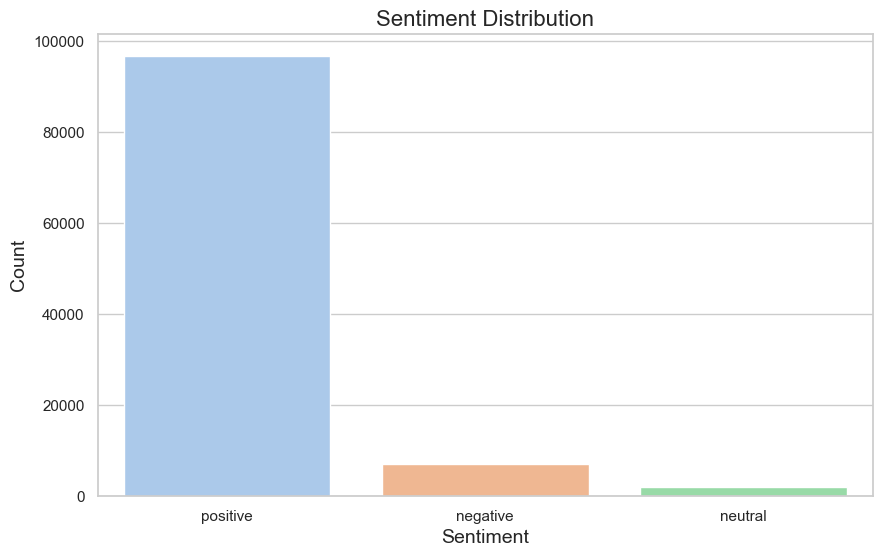

In [80]:
# Create sentiment distribution
sentiment_counts = rev_pre['sentiment_label'].value_counts()

# Create enhanced bar plot
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
colors = sns.color_palette('pastel')
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=colors)
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.show()



In [81]:
# Calculate percentages
total_count = sentiment_counts.sum()
percentage = (sentiment_counts / total_count) * 100

In [82]:
percentage

sentiment_label
positive    91.413301
negative     6.699461
neutral      1.887239
Name: count, dtype: float64

Let's analyze the negative feedbacks.

In [88]:
rev_pre_neg = rev_pre[rev_pre['sentiment_label'] == 'negative']
print("Total number of negative feedbacks:", rev_pre_neg.shape[0])

Total number of negative feedbacks: 7082


Let's see which customers made most of the negative feedbacks and what type of loyalty they have:

In [116]:
merged = pd.merge(rev_pre_neg, cust_acc, on='customer_id')
merged.head()

,review_id,customer_id,review_text,token_text,lemma_text,sentiment_scores,sentiment_label,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date
0,2,457475,product arrived labeled as jumbo salted peanut...,product arrived labeled jumbo salted peanuts p...,product arrive label jumbo salt peanut peanut ...,"{'neg': 0.129, 'neu': 0.762, 'pos': 0.11, 'com...",negative,390711,29,standard,1,2022-07-02
1,53,680337,this wasn't in stock the last time i looked. i...,stock time looked vermont country store weston...,stock time look vermont country store weston f...,"{'neg': 0.162, 'neu': 0.709, 'pos': 0.129, 'co...",negative,738732,48,premium,1,2023-01-05
2,54,703313,we're used to spicy foods down here in south t...,spicy foods south texas spicy doubt habanero n...,spicy foods south texas spicy doubt habanero n...,"{'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'comp...",negative,669071,16,standard,1,2022-11-23
3,68,274841,"i purchased the mango flavor, and to me it doe...",purchased mango flavor like mango hint sweetne...,purchase mango flavor like mango hint sweetnes...,"{'neg': 0.259, 'neu': 0.519, 'pos': 0.222, 'co...",negative,185282,40,standard,1,2022-03-26
4,70,210581,this was sooooo deliscious but too bad i ate e...,sooooo deliscious bad ate em fast gained pds f...,sooooo deliscious bad eat em fast gain pds fault,"{'neg': 0.397, 'neu': 0.385, 'pos': 0.218, 'co...",negative,114278,34,standard,1,2022-02-24


In [117]:
#group by loyalty type
merged_loy = merged.groupby("loyalty_type").count()[['review_id']]
merged_loy['%'] = merged_loy['review_id'] / rev_pre_neg.shape[0] * 100.0
merged_loy

,review_id,%
loyalty_type,,
business premium,175,2.471053
business standard,533,7.526123
premium,1263,17.833945
standard,5123,72.338323


In [122]:
#group by customers
merged_cust = merged['customer_id'].value_counts()
merged_cust.sort_values(ascending=False)[:10] #some of the customers who made negative comments - at most 2 feedbacks

customer_id
886338    2
204838    2
48205     2
888728    2
486946    2
328184    2
193629    2
188630    2
327980    2
745280    2
Name: count, dtype: int64

72% of negative feedback come from customers who have a standard loyalty type. 

The higher the level of loyalty, the less are the negative comments.

Let's analyse the posiive feedbacks.

In [136]:
rev_pre_pos = rev_pre[rev_pre['sentiment_label'] == 'positive']

In [137]:
merged_pos = pd.merge(rev_pre_pos, cust_acc, on='customer_id')
merged_pos.head()

,review_id,customer_id,review_text,token_text,lemma_text,sentiment_scores,sentiment_label,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date
0,1,814256,i have bought several of the vitality canned d...,bought vitality canned dog food products found...,buy vitality can dog food product find good qu...,"{'neg': 0.0, 'neu': 0.523, 'pos': 0.477, 'comp...",positive,792930,38,business standard,1,2023-02-09
1,3,104045,this is a confection that has been around a fe...,confection centuries light pillowy citrus gela...,confection century light pillowy citrus gelati...,"{'neg': 0.171, 'neu': 0.547, 'pos': 0.281, 'co...",positive,54217,28,business standard,1,2022-01-28
2,4,603662,if you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,look secret ingredient robitussin believe find...,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",positive,557880,48,business standard,1,2022-10-01
3,5,739314,great taffy at a great price. there was a wide...,great taffy great price wide assortment yummy ...,great taffy great price wide assortment yummy ...,"{'neg': 0.0, 'neu': 0.369, 'pos': 0.631, 'comp...",positive,709531,28,standard,1,2022-12-12
4,6,681946,i got a wild hair for taffy and ordered this f...,got wild hair taffy ordered pound bag taffy en...,get wild hair taffy order pound bag taffy enjo...,"{'neg': 0.048, 'neu': 0.629, 'pos': 0.323, 'co...",positive,718441,37,premium,1,2022-12-18


In [138]:
#group by loyalty type
merged_loy_pos = merged_pos.groupby("loyalty_type").count()[['review_id']]
merged_loy_pos['%'] = merged_loy_pos['review_id'] / rev_pre_pos.shape[0] * 100.0
merged_loy_pos

,review_id,%
loyalty_type,,
business premium,2667,2.759927
business standard,7473,7.733383
premium,17688,18.304306
standard,69005,71.409353


Also most of the positive feedbacks are done by standard loyalty type customers.

Wordcloud:

In [140]:
from wordcloud import WordCloud

In [154]:
# Combine all feedback into a single text
all_feedback = ' '.join(rev_pre_pos['lemma_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_feedback)


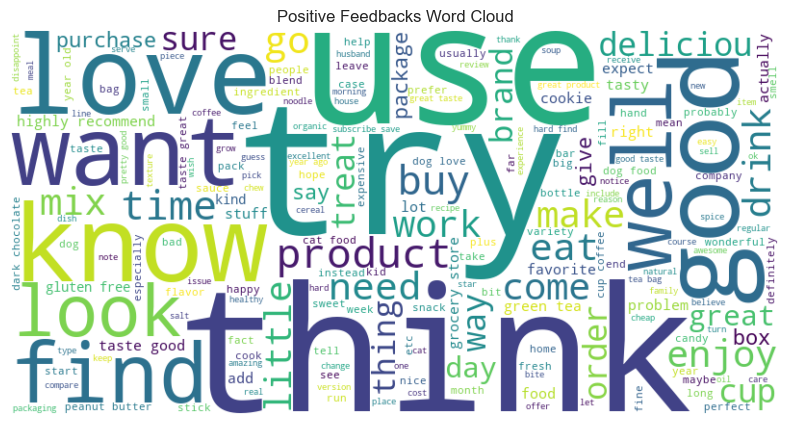

In [155]:
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Feedbacks Word Cloud")
plt.show()


In [151]:
# Combine all feedback into a single text - NEGATIVE
neg_feedback = ' '.join(rev_pre_neg['lemma_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(neg_feedback)

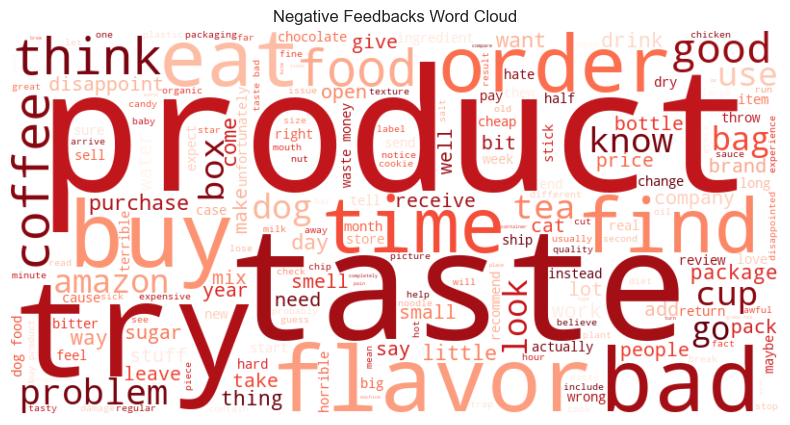

In [152]:
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Feedbacks Word Cloud")
plt.show()


##### VADER - no preprocessing - same results

In [142]:
cust_rev

,review_id,customer_id,review_text
0,1,814256,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2,457475,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,104045,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,4,603662,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,739314,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."
...,...,...,...
105705,140942,224091,"We Love,Love our Keurig coffee maker .My husband lives and breathes coffee and would rather have coffee at home than at store and he makes it himself .He perfers regular and I get the decaf."
105706,140943,196666,This is supposed to be a light roast coffee but it states extra bold on the label. How can a light roast coffee be extra bold. The outside of the box does not state that it is extra bold it only says light roast. Threw the entire box in the garbage after I tasted the first cup. Did not want to be bothered with returns.
105707,140944,618226,"I have always been happy with my Kcups but this particular box is not good! I made a cup and it was FULL of grinds, i thought maybe it was just that one so i made another....FULL of grinds. I can't use them!"
105708,140945,844918,I ordered light roast coffee and was sent one box of light roast and one box of extra bold. I didn't notice the error until I had used a couple of the extra bold pods. Way too strong for me and I am very disappointed. The light roast was really good.


In [146]:
%time
cust_rev['sentiment_scores'] = cust_rev['review_text'].parallel_apply(analyze_sentiment)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 5.96 µs


In [149]:
cust_rev['sentiment_label'] = cust_rev['sentiment_scores'].apply(lambda x: label_sentiment(x['compound']))

In [150]:
cust_rev

,review_id,customer_id,review_text,sentiment_scores,sentiment_label
0,1,814256,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.9441}",positive
1,2,457475,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".","{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}",negative
2,3,104045,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.","{'neg': 0.085, 'neu': 0.771, 'pos': 0.144, 'compound': 0.8138}",positive
3,4,603662,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,"{'neg': 0.0, 'neu': 0.932, 'pos': 0.068, 'compound': 0.4404}",positive
4,5,739314,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.","{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'compound': 0.9468}",positive
...,...,...,...,...,...
105705,140942,224091,"We Love,Love our Keurig coffee maker .My husband lives and breathes coffee and would rather have coffee at home than at store and he makes it himself .He perfers regular and I get the decaf.","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",neutral
105706,140943,196666,This is supposed to be a light roast coffee but it states extra bold on the label. How can a light roast coffee be extra bold. The outside of the box does not state that it is extra bold it only says light roast. Threw the entire box in the garbage after I tasted the first cup. Did not want to be bothered with returns.,"{'neg': 0.058, 'neu': 0.806, 'pos': 0.137, 'compound': 0.7856}",positive
105707,140944,618226,"I have always been happy with my Kcups but this particular box is not good! I made a cup and it was FULL of grinds, i thought maybe it was just that one so i made another....FULL of grinds. I can't use them!","{'neg': 0.079, 'neu': 0.872, 'pos': 0.05, 'compound': -0.3276}",negative
105708,140945,844918,I ordered light roast coffee and was sent one box of light roast and one box of extra bold. I didn't notice the error until I had used a couple of the extra bold pods. Way too strong for me and I am very disappointed. The light roast was really good.,"{'neg': 0.054, 'neu': 0.722, 'pos': 0.224, 'compound': 0.8611}",positive


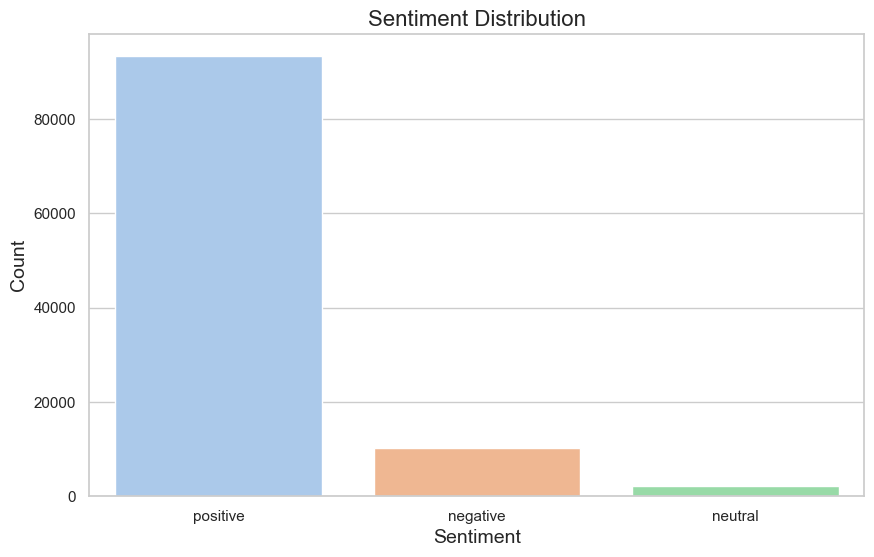

In [151]:
# Create sentiment distribution
sentiment_counts2 =  cust_rev['sentiment_label'].value_counts()

# Create enhanced bar plot
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
colors = sns.color_palette('pastel')
sns.barplot(x=sentiment_counts2.index, y=sentiment_counts2.values, palette=colors)
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [152]:
# Calculate percentages
total_count = sentiment_counts2.sum()
percentage = (sentiment_counts / total_count) * 100

In [153]:
percentage

sentiment_label
positive    91.413301
negative     6.699461
neutral      1.887239
Name: count, dtype: float64

### RFM and Churn - customer Focus

In [5]:
cust_acc['activation_date'] = pd.to_datetime(cust_acc['activation_date'], format='%Y-%m-%d')

prevention of the churn of high value customers by a marketing campaign for customer retention [CHURN + RFM];

 RFM Analysis in order to segment customers, based on their **Recency**, **Frequency** and **Monetary** values.

In [114]:
orders.head()

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.0,2022-10-04T182851
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1,1.99,0.0,2022-10-04T182851
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1,5.10,0.0,2022-10-04T182851
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1,76.05,0.0,2022-10-04T182851


In [163]:
#drop refunded items
df = orders[orders['direction'] == 1] #consider only purchases, no refunds transaction
df

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.0,2022-10-04T182851
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1,1.99,0.0,2022-10-04T182851
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1,5.10,0.0,2022-10-04T182851
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1,76.05,0.0,2022-10-04T182851
...,...,...,...,...,...,...,...,...
1039860,697c0078b69d9f8c119d8dd9a7952019,934581,29,35508942,1,33.60,0.0,2023-04-30T193553
1039861,86c9c4fdb8829e2ab90a86a357763419,934620,44,36237691,1,11.99,0.0,2023-04-30T191955
1039862,86c9c4fdb8829e2ab90a86a357763419,934620,44,81259479,1,9.99,0.0,2023-04-30T191955
1039863,86f8ca9e4008249e5e0acc5ff23e2284,934660,46,34067775,1,1.90,0.0,2023-04-30T193217


In [164]:
df = df[df['gross_price'] >= 0] #delete errors

In [165]:
df['purchase_datetime'] = pd.to_datetime(df['purchase_datetime'], format='%Y-%m-%dT%H%M%S')

In [166]:
df.shape

(976876, 8)

In [167]:
df['purchase_datetime'].min()

Timestamp('2022-05-01 07:19:05')

In [168]:
df['purchase_datetime'].max()

Timestamp('2023-04-30 21:11:13')

We can determine our date analysis 2023-05-01

In [121]:
now =  dt.datetime(2023,5,1)

Recency is how recently a customer made his **last purchase**.

In [122]:
rec = df.groupby('customer_id')[['purchase_datetime']].max()
rec

,purchase_datetime
customer_id,
23,2023-02-20 11:51:51
30,2022-07-23 07:06:38
32,2023-04-02 15:11:58
48,2023-04-30 19:35:36
50,2023-02-19 16:56:32
...,...
934484,2023-04-30 19:02:11
934581,2023-04-30 19:35:53
934620,2023-04-30 19:19:55


In [123]:
rec['recency'] = now - rec['purchase_datetime']

In [124]:
rec

,purchase_datetime,recency
customer_id,,
23,2023-02-20 11:51:51,69 days 12:08:09
30,2022-07-23 07:06:38,281 days 16:53:22
32,2023-04-02 15:11:58,28 days 08:48:02
48,2023-04-30 19:35:36,0 days 04:24:24
50,2023-02-19 16:56:32,70 days 07:03:28
...,...,...
934484,2023-04-30 19:02:11,0 days 04:57:49
934581,2023-04-30 19:35:53,0 days 04:24:07
934620,2023-04-30 19:19:55,0 days 04:40:05


Frequency: **how often** customers make a purchase (number of orders that made from the first purchase date)

In [126]:
rfm = df.groupby('customer_id').agg({'purchase_datetime' : lambda day : (now - day.max()).days,
                               'order_id': lambda num : len(num),
                              'gross_price': lambda price : price.sum()
                             
                             
                             })
col_list = ['Recency','Frequency','Monetary']

In [127]:
df.groupby('customer_id')['order_id']

In [128]:
rfm.columns = col_list

In [130]:
rfm["R"] = pd.qcut(rfm["Recency"],5,labels=[5,4,3,2,1])
rfm["F"] = pd.qcut(rfm["Frequency"],5,labels=[1,2,3,4,5])
rfm["M"] = pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])
rfm["RFM_Score"] = rfm["R"].astype(str) +rfm["F"].astype(str) + rfm["M"].astype(str)

In [131]:
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_Score
customer_id,,,,,,,
23,69,37,490.60,4,5,5,455
30,281,12,10179.56,1,4,5,145
32,28,11,58.85,5,4,3,543
48,0,52,1585.28,5,5,5,555
50,70,4,28.75,4,2,2,422
...,...,...,...,...,...,...,...
934484,0,5,39.10,5,3,3,533
934581,0,1,33.60,5,1,2,512
934620,0,2,21.98,5,1,2,512


In [132]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [133]:
rfm['Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
customer_id,,,,,,,,
23,69,37,490.60,4,5,5,455,Loyal Customers
30,281,12,10179.56,1,4,5,145,At Risk
32,28,11,58.85,5,4,3,543,Champions
48,0,52,1585.28,5,5,5,555,Champions
50,70,4,28.75,4,2,2,422,Potential Loyalists


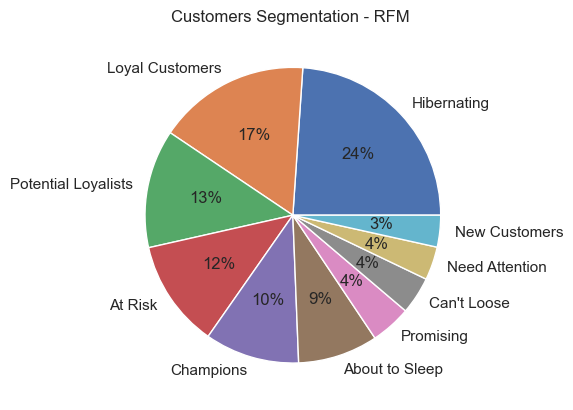

In [149]:
plt.pie(rfm.Segment.value_counts(),
        labels=rfm.Segment.value_counts().index,
        autopct='%.0f%%')
plt.title('Customers Segmentation - RFM ')
plt.show()

How much a customer of each segment spend on average:

In [156]:
rfm.groupby('Segment')['Monetary'].mean().sort_values(ascending=False).round(2)

Segment
Can't Loose            1022.06
Champions               646.10
Loyal Customers         638.07
At Risk                 209.32
Need Attention          142.13
Potential Loyalists     108.52
Hibernating              67.57
About to Sleep           60.30
Promising                49.58
New Customers            42.14
Name: Monetary, dtype: float64

In [158]:
#recency 
rfm['Recency'].describe().round(2)

count    104134.00
mean        130.49
std         100.82
min           0.00
25%          43.00
50%         110.00
75%         202.00
max         364.00
Name: Recency, dtype: float64

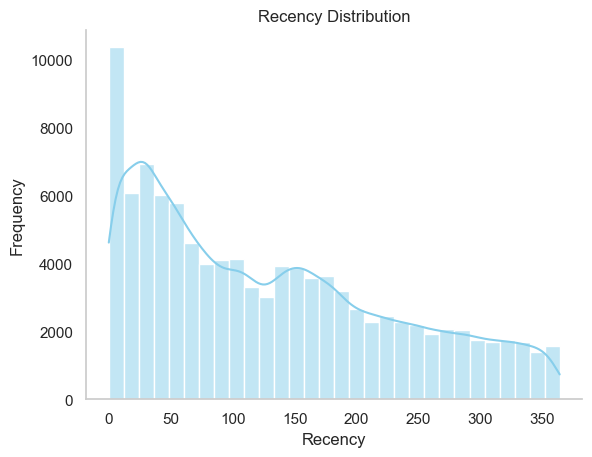

In [136]:
sns.set_style("whitegrid", {'axes.grid': False}) # Set the style to whitegrid
ax = sns.histplot(rfm['Recency'], bins=30, kde=True, color='skyblue')
ax.set(xlabel='Recency', ylabel='Frequency', title='Recency Distribution')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Customize the color of the histogram bars
#ax.patches[0].set_facecolor('salmon')  # Change the color of a specific bar (e.g., the 15th bar)

# # Add annotations or text
# ax.annotate('Peak', xy=(peak_x, peak_y), xytext=(peak_x + 10, peak_y + 5),
#             arrowprops=dict(arrowstyle='->'))
plt.show()



Repurchase curve:

In [169]:
df = df.sort_values(by='purchase_datetime', ascending=False) #date in cronological order

In [170]:
df.head()

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime
202199,1d3261da9ffdaccb7de92831d5f6d308,165171,3,35797734,1,1.50,0.0,2023-04-30 21:11:13
971412,15ece5079f678e02412b50d961dac045,790657,46,35905191,1,44.95,0.0,2023-04-30 21:09:21
971411,15ece5079f678e02412b50d961dac045,790657,46,82019008,1,5.98,0.0,2023-04-30 21:09:21
971410,15ece5079f678e02412b50d961dac045,790657,46,36550311,1,39.99,0.0,2023-04-30 21:09:21
971409,15ece5079f678e02412b50d961dac045,790657,46,36158185,1,29.99,0.0,2023-04-30 21:09:21


One shooter vs repeater customers:

##### Churn 

orders

In [152]:
orders

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.0,2022-10-04T182851
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1,1.99,0.0,2022-10-04T182851
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1,5.10,0.0,2022-10-04T182851
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1,76.05,0.0,2022-10-04T182851
...,...,...,...,...,...,...,...,...
1039860,697c0078b69d9f8c119d8dd9a7952019,934581,29,35508942,1,33.60,0.0,2023-04-30T193553
1039861,86c9c4fdb8829e2ab90a86a357763419,934620,44,36237691,1,11.99,0.0,2023-04-30T191955
1039862,86c9c4fdb8829e2ab90a86a357763419,934620,44,81259479,1,9.99,0.0,2023-04-30T191955
1039863,86f8ca9e4008249e5e0acc5ff23e2284,934660,46,34067775,1,1.90,0.0,2023-04-30T193217
